In [1]:
import numpy as np

'''
get the projective point(2D) of a point to a line

@param point: the coordinate of the point form as [a,b]
@param line: the line parameters form as [k, t] which means y = k*x + t
@return: the coordinate of the projective point  
'''
#输入一个坐标（a,b）投影到kx+t-y=0的直线上,设投影点为（X，Y）
#先求垂线，用点斜式设为（-1/k）(x-a)=y-b ，再联立kx+t-y=0 即可
def GetProjectivePoint_2D(point, line):
    a = point[0]
    b = point[1]
    k = line[0]
    t = line[1]

    if   k == 0:      return [a, t]
    elif k == np.inf: return [0, b]
    x = (a+k*b-k*t) / (k*k+1)
    y = k*x + t
    return [x, y]


In [2]:

#operator 操作函数库 
from _operator import inv
import numpy as np
import matplotlib.pyplot as plt 


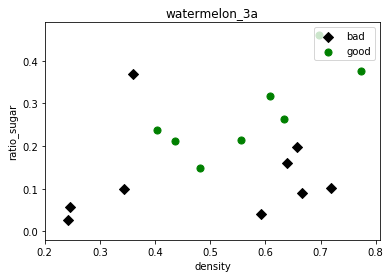

In [6]:
data_file = open('watermelon_3a.csv')
dataset = np.loadtxt(data_file, delimiter=",")
X = dataset[:,1:3]
y = dataset[:,3]

# draw scatter diagram to show the raw data
f1 = plt.figure(1)       
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
#marker 为形状 ‘*’为星星 'D'为钻石等  s为点的大小
#X[y == 0,0] 这个的写法是y==0相当于一个test语句，如果y的值不为0则不会返回，逗号右边的0指的是X的第0列
#同理此处相当于将所有标签为False的数据，以第0列为横坐标，第1列为纵坐标。画图
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'D', color = 'k', s=50, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=50, label = 'good')
#loc表示位置 右上方  左上方为upper left
plt.legend(loc = 'upper right')  
plt.show()

[[4 1]
 [1 3]]
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.75      0.75      0.75         4

   micro avg       0.78      0.78      0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



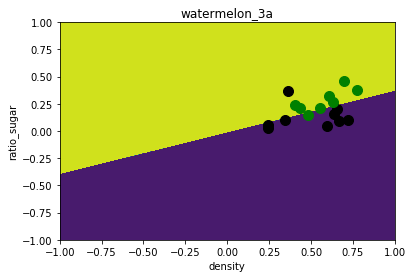

In [7]:
from sklearn import model_selection
#判别分析之线性判别分析
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#主要用于评估模型
from sklearn import metrics
import matplotlib.pyplot as plt

# generalization of train and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)

# model fitting lsrq 是某种算法
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X_train, y_train)

# model validation 测试集输入模型，预测
y_pred = lda_model.predict(X_test)

# summarize the fit of the model
#混淆矩阵
print(metrics.confusion_matrix(y_test, y_pred))
#显示精确度报告
print(metrics.classification_report(y_test, y_pred))

# draw the classfier decision boundary
f2 = plt.figure(2) 
#h是间隔
h = 0.001
# x0_min, x0_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
# x1_min, x1_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
#网络点格坐标矩阵
x0, x1 = np.meshgrid(np.arange(-1, 1, h),
                     np.arange(-1, 1, h))

# x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, h),
#                      np.arange(x1_min, x1_max, h))
#np.c_ r_ 分别为按行 按列 拼接矩阵
z = lda_model.predict(np.c_[x0.ravel(), x1.ravel()]) 

# Put the result into a color plot
#把z变成x0的形状
z = z.reshape(x0.shape)

plt.contourf(x0, x1, z)

# Plot also the training pointsplt.title('watermelon_3a')  
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.show()

In [8]:
u = []  
for i in range(2): # two class
    u.append(np.mean(X[y==i], axis=0))  # column mean

# 2-nd. computing the within-class scatter matrix, refer on book (3.33)
m,n = np.shape(X)
Sw = np.zeros((n,n))
for i in range(m):
    x_tmp = X[i].reshape(n,1)  # row -> cloumn vector
    if y[i] == 0: u_tmp = u[0].reshape(n,1)
    if y[i] == 1: u_tmp = u[1].reshape(n,1)
    Sw += np.dot( x_tmp - u_tmp, (x_tmp - u_tmp).T )

Sw = np.mat(Sw)
U, sigma, V= np.linalg.svd(Sw) 

Sw_inv = V.T * np.linalg.inv(np.diag(sigma)) * U.T
# 3-th. computing the parameter w, refer on book (3.39)
w = np.dot( Sw_inv, (u[0] - u[1]).reshape(n,1) )  # here we use a**-1 to get the inverse of a ndarray

print(w)

[[-6.62487509e-04]
 [-9.36728168e-01]]


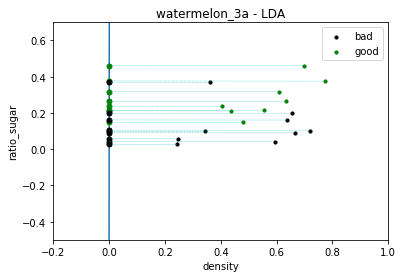

In [9]:
f3 = plt.figure(3)
plt.xlim( -0.2, 1 )
plt.ylim( -0.5, 0.7 )

p0_x0 = -X[:, 0].max()
p0_x1 = ( w[1,0] / w[0,0] ) * p0_x0
p1_x0 = X[:, 0].max()
p1_x1 = ( w[1,0] / w[0,0] ) * p1_x0

plt.title('watermelon_3a - LDA')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=10, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=10, label = 'good')
plt.legend(loc = 'upper right')  

plt.plot([p0_x0, p1_x0], [p0_x1, p1_x1])

# draw projective point on the line


m,n = np.shape(X)
for i in range(m):
    x_p = GetProjectivePoint_2D( [X[i,0], X[i,1]], [w[1,0] / w[0,0] , 0] ) 
    if y[i] == 0: 
        plt.plot(x_p[0], x_p[1], 'ko', markersize = 5)
    if y[i] == 1: 
        plt.plot(x_p[0], x_p[1], 'go', markersize = 5)   
    plt.plot([ x_p[0], X[i,0]], [x_p[1], X[i,1] ], 'c--', linewidth = 0.3)

plt.show()

[[ 0.67331937]
 [-2.75248052]]


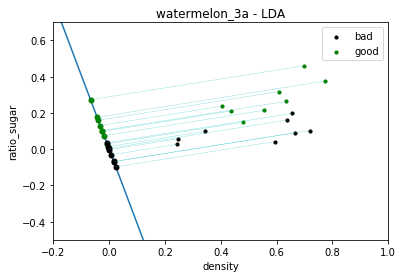

In [10]:
X = np.delete(X, 14, 0)
y = np.delete(y, 14, 0)

u = []  
for i in range(2): # two class
    u.append(np.mean(X[y==i], axis=0))  # column mean

# 2-nd. computing the within-class scatter matrix, refer on book (3.33)
m,n = np.shape(X)
Sw = np.zeros((n,n))
for i in range(m):
    x_tmp = X[i].reshape(n,1)  # row -> cloumn vector
    if y[i] == 0: u_tmp = u[0].reshape(n,1)
    if y[i] == 1: u_tmp = u[1].reshape(n,1)
    Sw += np.dot( x_tmp - u_tmp, (x_tmp - u_tmp).T )

Sw = np.mat(Sw)
U, sigma, V= np.linalg.svd(Sw) 

Sw_inv = V.T * np.linalg.inv(np.diag(sigma)) * U.T
# 3-th. computing the parameter w, refer on book (3.39)
w = np.dot( Sw_inv, (u[0] - u[1]).reshape(n,1) )  # here we use a**-1 to get the inverse of a ndarray

print(w)

# 4-th draw the LDA line in scatter figure

# f2 = plt.figure(2)
f4 = plt.figure(4)
plt.xlim( -0.2, 1 )
plt.ylim( -0.5, 0.7 )

p0_x0 = -X[:, 0].max()
p0_x1 = ( w[1,0] / w[0,0] ) * p0_x0
p1_x0 = X[:, 0].max()
p1_x1 = ( w[1,0] / w[0,0] ) * p1_x0

plt.title('watermelon_3a - LDA')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=10, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=10, label = 'good')
plt.legend(loc = 'upper right')  

plt.plot([p0_x0, p1_x0], [p0_x1, p1_x1])

# draw projective point on the line


m,n = np.shape(X)
for i in range(m):
    x_p = GetProjectivePoint_2D( [X[i,0], X[i,1]], [w[1,0] / w[0,0] , 0] ) 
    if y[i] == 0: 
        plt.plot(x_p[0], x_p[1], 'ko', markersize = 5)
    if y[i] == 1: 
        plt.plot(x_p[0], x_p[1], 'go', markersize = 5)   
    plt.plot([ x_p[0], X[i,0]], [x_p[1], X[i,1] ], 'c--', linewidth = 0.3)

plt.show()